<a href="https://colab.research.google.com/github/ymrcgl/heartAttack/blob/master/heartAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (303, 14)


In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [ ]:
corr_mat = df.corr()
corr_mat.style.background_gradient(cmap='BuGn')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


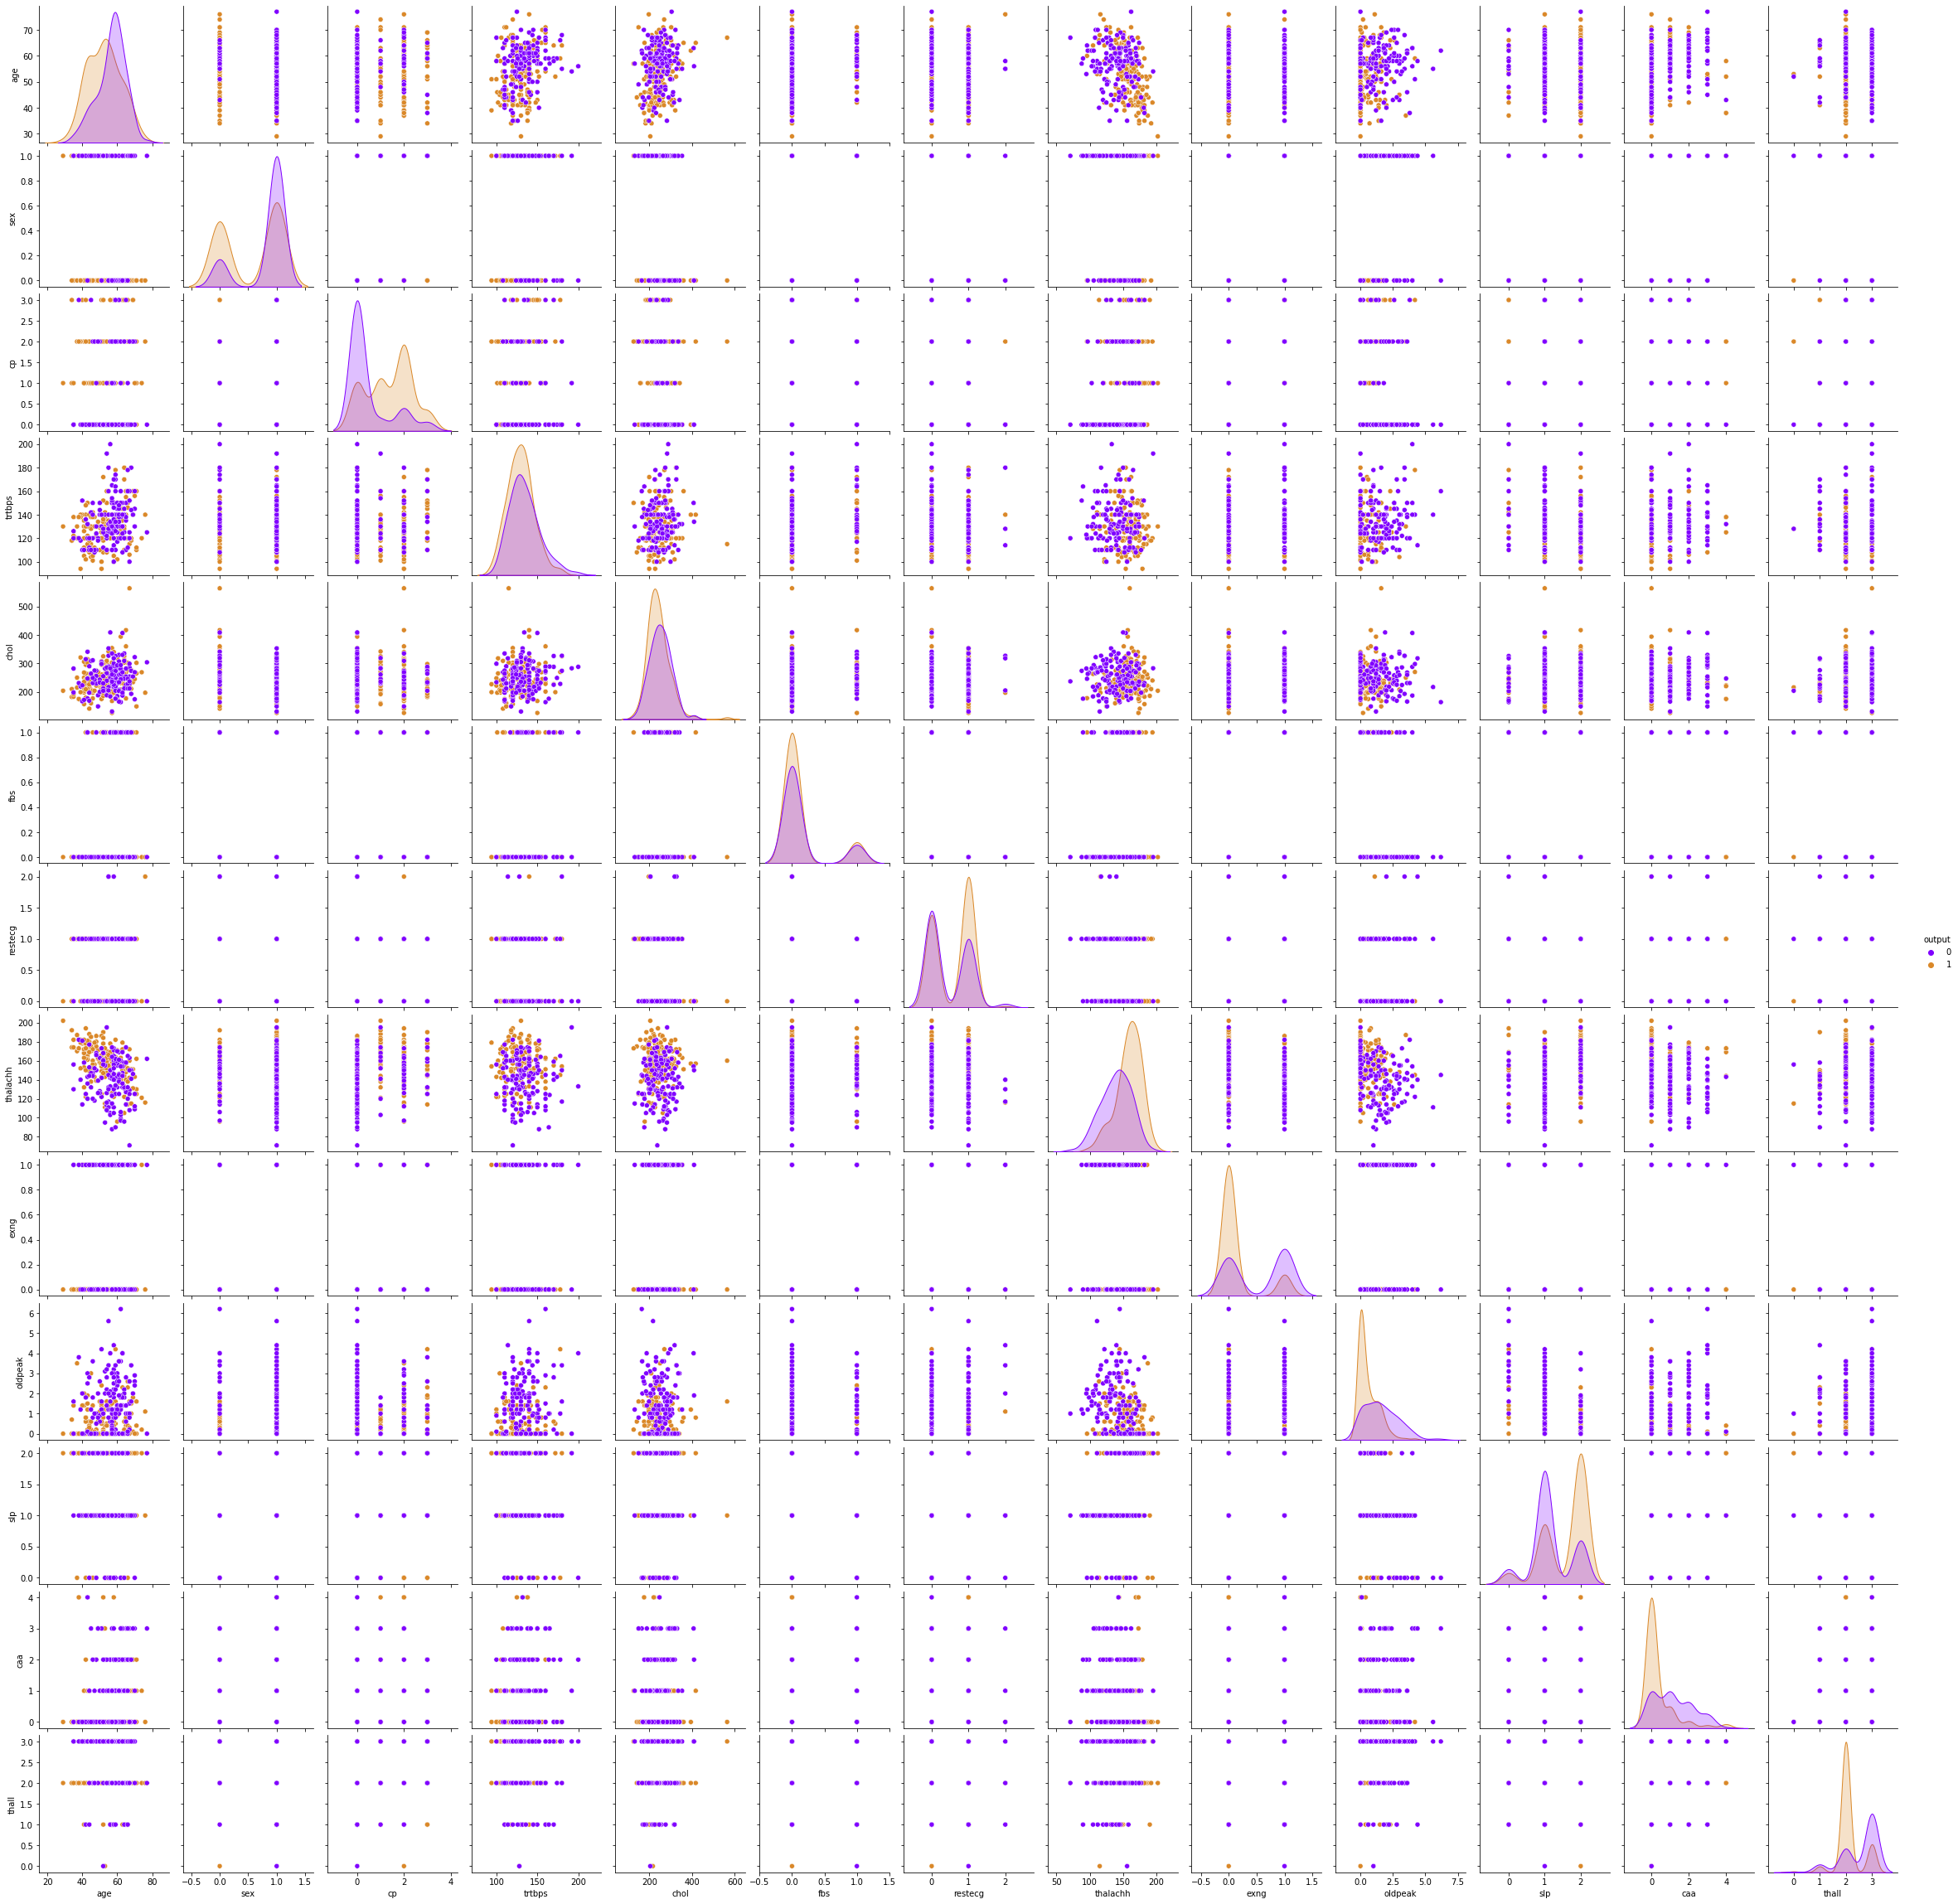

In [ ]:
sns.pairplot(df,hue='output',palette = ["#8000ff","#da8829"])
plt.show()

<Figure size 720x720 with 0 Axes>

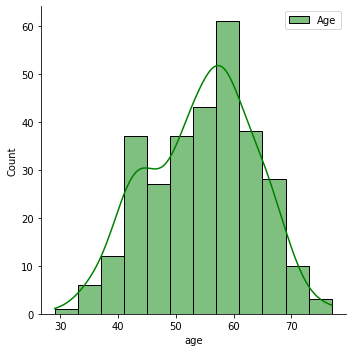

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(df.age, color="green", label="Age", kde= True)
plt.legend()

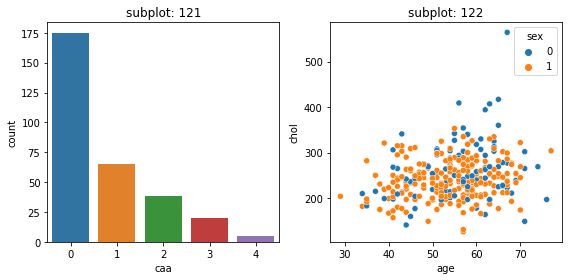

In [ ]:
fig = plt.figure(figsize=(8,4))

#  subplot #1
plt.subplot(121)
plt.title('subplot: 121')
sns.countplot(data = df, x = 'caa')

#  subplot #2
plt.subplot(122)
plt.title('subplot: 122')
sns.scatterplot(data = df, x = 'age', y = 'chol', hue = 'sex')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler


from sklearn.model_selection import train_test_split


import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score, classification_report, roc_curve


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



In [ ]:
df1 = df

# kodlanacak ve ölçeklenecek sütunları tanımlayın
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# kategorik sütunları kodlama
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# özellikleri ve hedefi tanımlama
X = df1.drop(['output'],axis=1)
y = df1[['output']]


# ölçekleyiciyi başlatma
scaler = RobustScaler()

X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


In [ ]:
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# değeri tahmin et
y_pred = clf.predict(X_test)

print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8688524590163934


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# olasılıkları hesapla
y_pred_proba = logreg.predict_proba(X_test)

#tahmin edilen değeri bulma
y_pred = np.argmax(y_pred_proba,axis=1)
# test doğruluğunu yazdırma
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.9016393442622951


In [ ]:
dt = DecisionTreeClassifier(random_state = 42)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7868852459016393


In [ ]:
rf = RandomForestClassifier()


rf.fit(X_train, y_train)

y_pred = dt.predict(X_test)


print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.7868852459016393


In [ ]:
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

gbt.fit(X_train,y_train)

y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Gradient Boosting Classifier is  0.8688524590163934


In [ ]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)
model_xgb.fit(X_train, y_train)

pred_xgb = model_xgb.predict(X_test)
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.8032786885245902


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
#modeli eğit
model_kn.fit(X_train, y_train)
#tahmini yap
pred_kn = model_kn.predict(X_test)
# dogrulugu hesapla
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.8852459016393442


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)
model_ada.fit(X_train, y_train)
# tahmini yap
pred_ada = model_ada.predict(X_test)
# dogrulugu hesapla
ada = accuracy_score(y_test, pred_ada)
print(ada)

0.8032786885245902


# Yeni Bölüm